# Data Analysis with Python

* Importing data into Python
* Working with date-times
* Manipulating and working with dataframes
* Analysis with SciPy and NumPy
* Visualisation with Matplotlib and Seaborn

* Working with large datasets

## Part 1: Loading data with Python

How you load data will depend on what the data is and how it's stored. (Probably) the commonest form of tabulated data is "CSV" - comma-separated-variables - each row is on a new line, each column is separated by a comma. However, there are an almost infinite array of possible formats, and you need to understand that format to start with. You might have already seen the issue with CSV - what if your data contains decimal commas?

As an analyst, often, your first problem will be to answer the question: "What the hell format is this and how do I get it into Python?"

### 1.1: Exploring an unknown file

Let's dive into the example data that Benoit provided me: three files labelled `Autostart[<x>].lvm`. I'd never heard of a .lvm file type before, but Google informs me that it's [a standard output format from LabView](https://www.ni.com/en-no/support/documentation/supplemental/06/specification-for-the-labview-measurement-file---lvm-.html), a raw text format that's essentially a customised CSV-like format, but with a lot more bells and whistles (which generally make things harder and more complicated)

Given that knowledge, I can start exploring
* The easiest place to start is to open the file in a text editor like `notepad.exe` (Windows), `nano` (Unix) or `TextEdit` (MacOS)
    * For this purpose, I **explicitly** recomend **against** Excel, as that will hide too much detail in its efforts to be helpful
* With the file open, I can see the following details:
    * The "header" makes up the top 7 rows, including 3 rows of column names
        1. File name/date
        2. Description
        3. Blank (?)
        4. Column category
        5. Column name
        6. Column name or unit
        7. End of header indicator
    * There is a column of date/time information, formatted like so: `YYYY.MM.DD<space>HH:MM:SS,msmsms`
    * Some columns contain invalid data, i.e. `NaN`, standing for "not a number"
    * All other columns appear to be numerical, no strings
    * Numbers are expressed with decimal commas, rather than decimal points
    * Column delimitation is space based. Not (yet) clear whether they are space or tab characters
    * Values are (partially) justified, suggesting tab delimitation is more likely than space.
    * There appear to be empty columns at the end of each row, but it's not clear if this is just an artifact of value justification.
    * The text encoding is `ISO-8859-1`

With that information in hand, I can start trying to import the data itself

### 1.2: Importing data with Pandas

`pandas` is generally the first (or second) big library newcomers to Python learn about. It's a tool for handling tabular data, and it does it very well. Amongst its utilities are a range of import tools - for getting data out of files, (or databases, or websites, or just about any other source) and into Python.

It doesn't have an explicit reader for `lvm`, but we can try and use its generic `csv` reader. We can make use of the various insights gleaned above to define how the csv reader should understand the file ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html))

In [1]:
import pytz
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# files
a26 = "Autostart[26].lvm"
a27 = "Autostart[27].lvm"
a28 = "Autostart[28].lvm"

# Try reading a file
df = pd.read_csv(
    a26, 
    encoding='ISO-8859-1',        # Specify non-default encoding
    sep= "\t",                    # tab delineated data
    decimal=",",                  # Use decimal comma instead of decimal point
    header=[3],                   # Use these rows to name the columns; note; empty rows are ignored for this purpose
    index_col=None,               # do not use the first column as index
    skiprows=[5, 6,],             # Zero indexed, remove both the row of units and the row of dashes
    skipinitialspace=True,        # remove empty spaces
)

df.head()

Unnamed: 0  RO1  RO2A  RO2B  RO3  RO4  RO5  RO6  RW1  RW2  \
0  2020.09.11 10:40:00,013  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  2020.09.11 10:50:00,031  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  2020.09.11 11:00:00,085  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  2020.09.11 11:10:00,075  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  2020.09.11 11:20:00,047  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ...    Rw4-9    Rw4-8    Rw4-7    Rw4-6    Rw4-5    Rw4-4    Rw4-3  \
0  ...  3.40228  2.89325  5.57451  6.91699  7.13265  7.40728  7.33199   
1  ...  3.61086  2.93035  5.55845  6.95067  7.13487  7.42043  7.33920   
2  ...  4.39331  2.97008  5.55097  6.91706  7.17010  7.45611  7.36229   
3  ...  5.78999  2.89081  5.46642  6.83990  6.90708  7.23365  7.19825   
4  ...  6.38457  3.04604  5.47792  6.84280  7.03495  7.33744  7.26499   

     Rw4-2    Rw4-1    temp.  
0  7.16972  6.97934  13.0277  
1  7.16743  6.98584  13.3566  
2  7.19338  7.02084  14.1389  
3  7.07396  6.91612  13.4112  
4  7.11101  6.94082  14.1502  

[5 rows x 121 columns]

Now, we can inspect the dataframe to see if there's anything that the CSV reader has struggled with

You will notice that because the Time column is badly formatted, with the column name one row down from the row that other columns are named on, it has receieved a default name. We can go ahead and clean that up by renaming it

In [3]:
df.rename(columns={"Unnamed: 0": "Time"}, inplace=True)
df.head()

Time  RO1  RO2A  RO2B  RO3  RO4  RO5  RO6  RW1  RW2  \
0  2020.09.11 10:40:00,013  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  2020.09.11 10:50:00,031  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  2020.09.11 11:00:00,085  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  2020.09.11 11:10:00,075  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  2020.09.11 11:20:00,047  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   ...    Rw4-9    Rw4-8    Rw4-7    Rw4-6    Rw4-5    Rw4-4    Rw4-3  \
0  ...  3.40228  2.89325  5.57451  6.91699  7.13265  7.40728  7.33199   
1  ...  3.61086  2.93035  5.55845  6.95067  7.13487  7.42043  7.33920   
2  ...  4.39331  2.97008  5.55097  6.91706  7.17010  7.45611  7.36229   
3  ...  5.78999  2.89081  5.46642  6.83990  6.90708  7.23365  7.19825   
4  ...  6.38457  3.04604  5.47792  6.84280  7.03495  7.33744  7.26499   

     Rw4-2    Rw4-1    temp.  
0  7.16972  6.97934  13.0277  
1  7.16743  6.98584  13.3566  
2  7.19338  7.02084  14.1389  
3  7.07396  6.91612  13.4112  
4  7.11101  6.94082  14.1502  

[5 rows x 121 columns]

Judging by the decimal comma in the Time column, it's probably still stored as arbitrary strings, rather than as datetime objects. We could have attempted automatic parsing of datetimes during the CSV reading, but there isn't a convenient way to _specify the format_, only to have Pandas guess at it, during that process - which can lead to unexpected results when, e.g., Pandas assumes that everyone is American and therefore everyone expresses dates as `mm/dd/yy`.

String based dates are really only usable by humans - we can read the datetime `2020.09.11 11:10:00` and recognise that it means the 11th of September 2020, right about time for a coffee break - but the computer can't directly comprehend that. It needs to convert it into a datetime object which can be comprehended as such. For example, we can't use it as an axis to plot our numerical data against, as the computer has no way to inperret from the text to some kind of numerical value

In [4]:
print(df["Time"][0])
print(type(df["Time"][0]))

2020.09.11 10:40:00,013
<class 'str'>


We can convert that to a datetime easily enough by telling Pandas how the string is formatted (which we looked at manually up above). Pandas and the `datetime` module of Python both use the same way of expressing time formatting, which is documented [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior). As with `read_csv`, it is possible to let Pandas infer the format itself, rather than specifying it in advance, but this _can_ result in errors due to the ambiguities between standard and USA-specific datetime formats. 

In [5]:
df["Time"] = pd.to_datetime(
    df["Time"],
    format="%Y.%m.%d %H:%M:%S,%f",
)

<AxesSubplot:xlabel='Time', ylabel='temp.'>

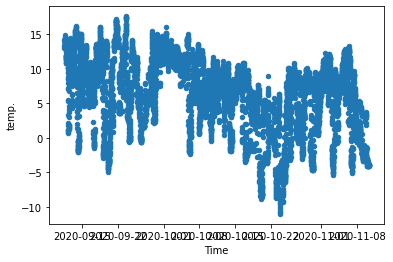

In [6]:
df.plot.scatter("Time", "temp.")

## Part 2: Working with Dates and Times

Time is _complicated_. If you have any assumptions about how to handle time in your analysis, you should probably operate on the belief that it will, _eventually_ be proven wrong. If you're lucky, that "_eventually_" will be sufficiently far into the future that it's someone else's problem. 

There is a fairly famous list that has done the rounds of the internet: [Falsehoods programmers believe about time](https://gist.github.com/timvisee/fcda9bbdff88d45cc9061606b4b923ca). It's well worth a read through if you have 10 minutes spare - and if you do, try and think about _what_ about each line is false, and how that falsity might affect your own analyses.

Time is just too big and complicated a subject to handle every small detail, so I'll keep to a few obvious pitfalls that you should be aware about.

(Quoted comments are _falsehoods_ from the above link!)

### 2.1: Time zones

> The machine that a program runs on will always be in the GMT time zone.

This is the most obvious one, ever since long distance train travel made it necessary to synchronise clocks in distant towns. Norway, along with most of Europe, operates on Central European Time (CET, GMT+1). Except for when it's on Central European Summer Time (CEST, GMT+2, see next section).

_Often_, time zones can just be ignored - if you're dealing with data from a local system; or from a local series of sensors, then _probably_ they will be in the same time zone as you.

If you start working with cloud computing or cloud databases, you should immediately start to care about timezones - there is no guarantee that the computer you're using, or the database you're writing data into has the same timezone as you, unless you have explicitly set it yourself.

Within Python (and most other programming languages), datetime objects can handle information about TimeZones, but it only does so if the user chooses to do so. By default, datetime objects contain no timezone information

Time zone data can be made available to Python via the `tzdata` or `pytz` packages

In [2]:
cet = pytz.timezone("Europe/Oslo")
utc = pytz.timezone("UTC")
lmt = pytz.timezone("America/Toronto")
print(datetime.datetime.now())
print(datetime.datetime.utcnow())
print("---")
print(datetime.datetime.now(cet))
print(datetime.datetime.now(utc))
print(datetime.datetime.now(lmt))

2023-01-12 11:25:29.513719
2023-01-12 10:25:29.513904
---
2023-01-12 11:25:29.513968+01:00
2023-01-12 10:25:29.514051+00:00
2023-01-12 05:25:29.514095-05:00


Typically, the best way to handle time zone information is:
* To include it even if you're not sure it's needed. It's much easier to ignore data that is present than to struggle to recreate data that is not present
* Express dates and times in internationally recognised formats ([ISO8601](https://en.wikipedia.org/wiki/ISO_8601))
* For data that will be handled by computer rather than by humans, express dates and times in a "generic" time zone (typically UTC), and leave it up to the computer to perform the more complex transformations into local time zones as and when needed
    * For exmaple, with the datetime module, you can request the current _local_ time with `datetime.now()`, or the current UTC time with `datetime.utcnow()`
    * Even better, do this, _and_ specify what that generic time zone is)

### 2.2: Daylight Savings

> Ok, that’s not true. But at least the time zone in which a program has to run will never change.

> Time always goes forwards.

This is the commonest of the "really nasty" time related problems. In March, an hour just _disappears_. In October, an hour happens _twice_. This can be a nasty surprise when the user might reasonably expect data to advance monotonically (1, 2, 3, 4, 5) instead of (1, 2, 3, **5**, 6) or (1, 2, 3, **3**, 4)

Daylight savings is a special case in which time zones change based on calendar _and_ location, rather than purely due to changing longtitude. If you follow best practices regarding time zone information, Daylight Savings issues are also handled (and can be checked for by comparing the UTC offset before/after DST transitions)
* Track time in UTC, co-ordinated universal time, rather than local time
* Store the offset from UTC with every timestamp, _even if_ storing the timestamp itself in UTC




<AxesSubplot:title={'center':'Daylight Savings'}>

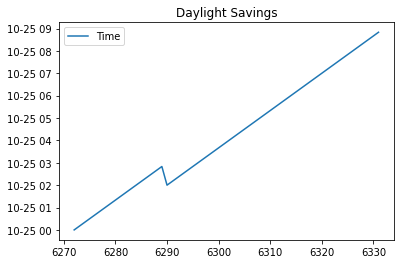

In [8]:
start = "2020-10-25 00:00"
finish = "2020-10-25 09:00"

date_mask = (df["Time"] > start) & (df["Time"] < finish)
df[date_mask].plot(y="Time", title="Daylight Savings")

#### But what if I didn't handle this up front and have to compensate after the fact?

This is an especially common question. Fortunately, Daylight Savings has a moderately predictable pattern, and so it *can* be compensated for in postprocessing (although I would urge you to consider DST issues during the experimental design phase _where possible_!).

We can:
* Check if the period of data covered crosses a DST boundary (final week each of October and March)
* Is data non-monotonic (i.e. does time jump backwards in October; are there missing times in March?)
* Search for which indicies of data need to be corrected
* Add timezone information for all timestamps; changing both value and timezone for those indicies which need to be updated

It turns out that Pandas can actually _do all of that for us_, via its `tz_localize` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tz_localize.html)
```bash
ambiguous‘infer’, bool-ndarray, ‘NaT’, default ‘raise’

    When clocks moved backward due to DST, ambiguous times may arise. For example in Central European Time (UTC+01), when going from 03:00 DST to 02:00 non-DST, 02:30:00 local time occurs both at 00:30:00 UTC and at 01:30:00 UTC. In such a situation, the ambiguous parameter dictates how ambiguous times should be handled.

        ‘infer’ will attempt to infer fall dst-transition hours based on order

        bool-ndarray where True signifies a DST time, False designates a non-DST time (note that this flag is only applicable for ambiguous times)

        ‘NaT’ will return NaT where there are ambiguous times

        ‘raise’ will raise an AmbiguousTimeError if there are ambiguous times.
```

I'm going to store the time-zone aware data in a new column, `Time_tz`, so that we can see the difference

In [9]:
# Localise the time data. Around the DST transition, have Pandas try and infer the boundaries
# Add as a new column
df["Time_tz"] = df["Time"].dt.tz_localize(
    tz="Europe/Oslo",          # I _assume_ that this is the correct localisation
    ambiguous="infer"          # How to handle daylight savings
)
# Re-order columns to move the new, final column to be next to the original Time column for easier comparison
columns = df.columns.tolist()
columns.remove("Time_tz")
columns.insert(1, "Time_tz")
df = df[columns]

# Display what this localisation looks like
df["Time_tz"]

0      2020-09-11 10:40:00.013000+02:00
1      2020-09-11 10:50:00.031000+02:00
2      2020-09-11 11:00:00.085000+02:00
3      2020-09-11 11:10:00.075000+02:00
4      2020-09-11 11:20:00.047000+02:00
                     ...               
8625          2020-11-10 07:10:00+01:00
8626   2020-11-10 07:20:00.024000+01:00
8627   2020-11-10 07:30:00.016000+01:00
8628   2020-11-10 07:40:00.094000+01:00
8629   2020-11-10 07:50:00.088000+01:00
Name: Time_tz, Length: 8630, dtype: datetime64[ns, Europe/Oslo]

In [10]:
df[date_mask].tail()

Time                          Time_tz  RO1  RO2A  \
6327 2020-10-25 08:10:00.069 2020-10-25 08:10:00.069000+01:00  NaN   NaN   
6328 2020-10-25 08:20:00.064 2020-10-25 08:20:00.064000+01:00  NaN   NaN   
6329 2020-10-25 08:30:00.077 2020-10-25 08:30:00.077000+01:00  NaN   NaN   
6330 2020-10-25 08:40:00.036 2020-10-25 08:40:00.036000+01:00  NaN   NaN   
6331 2020-10-25 08:50:00.015 2020-10-25 08:50:00.015000+01:00  NaN   NaN   

      RO2B  RO3  RO4  RO5  RO6  RW1  ...    Rw4-9    Rw4-8    Rw4-7    Rw4-6  \
6327   NaN  NaN  NaN  NaN  NaN  NaN  ... -0.72585 -0.72513 -0.14543  1.92693   
6328   NaN  NaN  NaN  NaN  NaN  NaN  ... -0.71511 -0.72091 -0.16756  1.95084   
6329   NaN  NaN  NaN  NaN  NaN  NaN  ... -0.66503 -0.68873 -0.11967  1.86839   
6330   NaN  NaN  NaN  NaN  NaN  NaN  ... -0.77479 -0.76898 -0.18974  1.90472   
6331   NaN  NaN  NaN  NaN  NaN  NaN  ... -0.67469 -0.68340 -0.11604  1.97371   

        Rw4-5    Rw4-4    Rw4-3    Rw4-2    Rw4-1    temp.  
6327  2.98223  4.05047  5.07605  5.26962  5.43139  7.93857  
6328  3.03168  4.06438  5.07036  5.26059  5.41091  6.57236  
6329  3.06382  4.15005  5.14724  5.32575  5.47056  7.70618  
6330  2.88769  3.94395  4.98482  5.18751  5.36314  6.24908  
6331  3.07492  4.13815  5.13465  5.31317  5.45392  6.76348  

[5 rows x 122 columns]

Notice that the displayed value hasn't changed. What was previously given as `2022-10-25 00:00:00` has become `2020-10-25 00:00:00+02:00`. What the data means _to a human reader_ has not changed - we still mean that this data sample was generated at (local)  midnight between October 24 and October 25. 

What has changed is how this data is expressed to the computer - these timestamps are now referenced to _something_, that allows the computer to treat those timestamps _in context_.

Therefore, where we previously had a discontinuity around `2020-10-25 03:00:00`, now we do not. We can plot the graph a second time and see that the discontinuity has been dealt with.


<AxesSubplot:title={'center':'Daylight Savings'}>

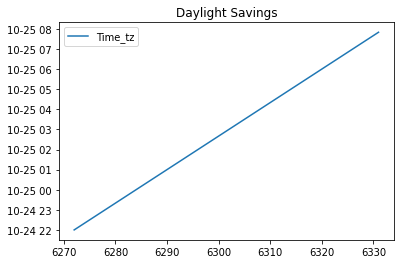

In [11]:
start = "2020-10-25 00:00"
finish = "2020-10-25 09:00"

date_mask_tz = (df["Time_tz"] > start) & (df["Time_tz"] < finish)
df[date_mask_tz].plot(y="Time_tz", title="Daylight Savings")

This graph - and the query that produced it - bears taking some time to understand. I used exactly the same start/end times - strings in iso8601 format that Pandas implicitly interpreted as datetimes - and compared them to the new `Time_tz` column. 

If you examine the Y-axis carefully, you will note that the times now range from `2020-10-24 22:00:00` - 2 hours earlier than I requested - to `2020-10-25 08:00:00` - one hour earlier than I requested. 

Why?

Let's look at the data directly around the DST transition

In [12]:
df[6287:6293]

Time                          Time_tz  RO1  RO2A  \
6287 2020-10-25 02:30:00.027 2020-10-25 02:30:00.027000+02:00  NaN   NaN   
6288 2020-10-25 02:40:00.024 2020-10-25 02:40:00.024000+02:00  NaN   NaN   
6289 2020-10-25 02:50:00.050 2020-10-25 02:50:00.050000+02:00  NaN   NaN   
6290 2020-10-25 02:00:00.084 2020-10-25 02:00:00.084000+01:00  NaN   NaN   
6291 2020-10-25 02:10:00.088 2020-10-25 02:10:00.088000+01:00  NaN   NaN   
6292 2020-10-25 02:20:00.016 2020-10-25 02:20:00.016000+01:00  NaN   NaN   

      RO2B  RO3  RO4  RO5  RO6  RW1  ...   Rw4-9   Rw4-8    Rw4-7    Rw4-6  \
6287   NaN  NaN  NaN  NaN  NaN  NaN  ... -2.4303 -1.3120 -0.14599  2.02253   
6288   NaN  NaN  NaN  NaN  NaN  NaN  ... -2.5275 -1.4018 -0.23116  2.00153   
6289   NaN  NaN  NaN  NaN  NaN  NaN  ... -2.4024 -1.3351 -0.15845  2.10820   
6290   NaN  NaN  NaN  NaN  NaN  NaN  ... -2.4046 -1.3463 -0.19283  1.97426   
6291   NaN  NaN  NaN  NaN  NaN  NaN  ... -2.3555 -1.3459 -0.19705  2.05059   
6292   NaN  NaN  NaN  NaN  NaN  NaN  ... -2.2572 -1.2784 -0.14073  1.97559   

        Rw4-5    Rw4-4    Rw4-3    Rw4-2    Rw4-1    temp.  
6287  3.23530  4.20966  5.19741  5.36206  5.49302  4.83586  
6288  2.95032  3.98345  5.02805  5.22069  5.39989  4.65797  
6289  3.17026  4.15194  5.13790  5.31164  5.44787  3.84305  
6290  3.03983  4.07228  5.08421  5.28088  5.42880  4.27922  
6291  3.09888  4.09363  5.08021  5.27378  5.41192  1.41574  
6292  3.14926  4.15634  5.14611  5.32534  5.47730  3.05826  

[6 rows x 122 columns]

In the `Time` column, we see the ambiguous timestamps: At index 6289, the clock reads 02:50. At index 6290, the clock reads 02:00, 50 minutes earlier - even though we can be fairly confident that in fact 10 minutes of real time have passed. 

In the `Time_tz` column, we can see what is really going on: 10 minutes after 02:50+2, we get to 02:00+1. Converting to UTC - i.e.e a system without Daylight savings, it all makes much more sense: at index 6289, the time was 00:50 (i.e. 02:50 - 02:00). At index 6290, the time was 01:00 (i.e. 02:00 - 01:00). Ten minutes later, as expected. 

Meanwhile, I specified `start` and `finish` as not being aware of, or bound to, any specific time zone, and I relied on Panda's implicit string conversion to turn them into - something - like a datetime.

I genuinely don't know _exactly_ how Pandas does that, or what assumptions it makes, although the _apparent behaviour_ seems to be to perform a non-time-zone-aware comparison to select which rows are displayed - selecting exactly the same rows as I had previously selected before localising the time column - but display them on graph with the timezone awareness. The bottom of the Y-axis is `2022-10-24 22:00:00` - which is the UTC value of `2022-10-25 00:00:00+02:00`.



Ultimately, this comes back to my points above:
* If you run any risk of dealing with timestamps that cross time zones (including Daylight Savings), include time zone information
* If you include time zone information, include it explicitly _everywhere_ (because you don't know how differently it may be handled if left _implicit_)

A final point I want to impress home:
* TIme is one of the most complicated kinds of data to handle correctly. Where possible, make use of well supported libraries (such as `datetime`, `pytz`, `pandas`, `numpy` and others). They will never guarantee to be bug free - but they will probably be more bug free than trying to handle time entirely by yourself

### 2.3: Clock synchronisation and accuracy

> One minute on the system clock has exactly the same duration as one minute on any other clock

> If the system clock is incorrect, it will at least always be off by a consistent number of seconds.

Any time that you're dealing with two or more time-aware devices ("clocks"), you have to worry about whether they _agree_ about what time it is, and how time is passing. At a coarse level, this is covered above - do both clocks think they are in the same time zone?

Internet connected devices typically rely on something called NTP (network time protocol) to synchronise their clocks fairly precisely - typically to within about 20 milliseconds of some central "master" clock. For most purposes relating to interfacing with humans, that's mostly "good enough"  - although if you ever get into time sensitive programming, you'll rapidly learn how important the word "mostly" is in that sentence. 

However, clocks that are _not_ internet connected are on their own - they have to rely on whatever internal clock they have available. Which might be fine. _Or it might not be_. 
* Most electronic devices contain a (or several) quartz crystal oscillators for maintaining time. Depending on the manufacturer's budget, design process, crystal aging, and  crystal temperature stability, quartz oscillators can range in quality between losing 1s per day, to 1s per million years
* Devices that connect to alternating-current mains often use the 50Hz mains signal, because that is maintained very precisely at 50Hz over long periods of time - [right up until it isn't](https://www.wired.co.uk/article/clock-slow-europe-electricity-power-serbia-kosovo). Due to a border conflict between Serbia and Kosovo, synchronous mains clocks across all of mainland Europe's grid were up to 6 minutes slow
* Computers designed to run on the mains might not have a battery back-up for their clock. If the power is cut, the computer cannot keep incrementing time, so the duration of the power cut is "lost", and the clock is left "slow". Raspberry Pis are one such design. 

Thus, even if you synchronise several data loggers in advance, by the end of an experiment months or years later, none of the loggers will agree exactly what time it is. _How much_ they disagree by will be a key factor to consider. 


Dealing with this problem is highly context specific, and is usually best addressed during the experimental design phase. Depending on the level of precision you require, you may have to find a way to keep the instruments synchronised with each other throughout the experiment. If lower precision is acceptable, it may be acceptable to either ignore the problem completely; or to compensate for an average drift by noting the "final time" as compared to a master reference and scaling all timestamps accordingly. 

## Part 3: Working with Dataframes

Pandas provides a wealth of tools for working with tabular data in dataframes. At the very basic level, we can do some quick summary descriptions and plots of data



In [13]:
df.describe()

RO1  RO2A  RO2B  RO3  RO4  RO5  RO6  RW1  RW2  RW4  ...        Rw4-9  \
count  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  8630.000000   
mean   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...     3.191954   
std    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...     3.666341   
min    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    -4.648400   
25%    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...     0.160434   
50%    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...     2.885175   
75%    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...     6.096900   
max    NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    13.248900   

             Rw4-8        Rw4-7        Rw4-6        Rw4-5        Rw4-4  \
count  8630.000000  8630.000000  8630.000000  8630.000000  8630.000000   
mean      3.493432     4.004556     4.673078     4.983012     5.386591   
std       2.733752     2.405159     1.818648     1.549606     1.256712   
min      -1.821100    -0.256840     1.495830     2.279610     3.252680   
25%       1.053330     1.538337     2.552367     3.267350     3.853230   
50%       3.784685     4.577855     5.403195     5.683130     5.991180   
75%       5.862620     6.194950     6.367565     6.393842     6.393720   
max       8.900520     7.605790     6.950670     7.170100     7.515890   

             Rw4-3        Rw4-2        Rw4-1        temp.  
count  8630.000000  8630.000000  8630.000000  8630.000000  
mean      5.795537     5.829557     5.862362     6.185341  
std       0.943913     0.833475     0.719514     5.356559  
min       4.008080     4.181420     4.391920   -11.001000  
25%       4.931773     5.156442     5.340995     2.569585  
50%       6.139695     6.088640     6.046715     7.127670  
75%       6.455647     6.414238     6.374548    10.250300  
max       7.449880     7.267460     7.110710    17.635700  

[8 rows x 120 columns]

### 3.1: Indexing

A critical skill for working with either tabular data in Pandas, or array data in NumPy, is understanding the concepts around indexing and selecting data.

In Python, indexing is indicated with square brackets (`[]`). Selecting a range is performed by indicating the start and stop indicies separated by a colon (`:`). When indexing a multi-dimensional structure, the indicies for each dimension are separated by commas (`,`).

Python uses zero-indexing: that is, the first row of a table has an index value of **0**. When selecting a range, as a general rule, the start value is **included** and the stop value is **excluded**

Dataframes offer several ways to index, and are more complex to index than a simple array or list structure. Columns or groups of rows can be indexed directly on the dataframe object itself:

In [14]:
df["Time"]

0      2020-09-11 10:40:00.013
1      2020-09-11 10:50:00.031
2      2020-09-11 11:00:00.085
3      2020-09-11 11:10:00.075
4      2020-09-11 11:20:00.047
                 ...          
8625   2020-11-10 07:10:00.000
8626   2020-11-10 07:20:00.024
8627   2020-11-10 07:30:00.016
8628   2020-11-10 07:40:00.094
8629   2020-11-10 07:50:00.088
Name: Time, Length: 8630, dtype: datetime64[ns]

In [15]:
df[4:6]

Time                          Time_tz  RO1  RO2A  RO2B  \
4 2020-09-11 11:20:00.047 2020-09-11 11:20:00.047000+02:00  NaN   NaN   NaN   
5 2020-09-11 11:30:00.007 2020-09-11 11:30:00.007000+02:00  NaN   NaN   NaN   

   RO3  RO4  RO5  RO6  RW1  ...    Rw4-9    Rw4-8    Rw4-7    Rw4-6    Rw4-5  \
4  NaN  NaN  NaN  NaN  NaN  ...  6.38457  3.04604  5.47792  6.84280  7.03495   
5  NaN  NaN  NaN  NaN  NaN  ...  5.94872  3.17406  5.48337  6.90031  7.10197   

     Rw4-4    Rw4-3    Rw4-2    Rw4-1    temp.  
4  7.33744  7.26499  7.11101  6.94082  14.1502  
5  7.39847  7.32436  7.14332  6.97147  14.0293  

[2 rows x 122 columns]

You will also see `df.loc[]` and `df.iloc[]`. These are distinguished by whether you wish to select the column by **name** (`.loc`), or by **index** (`.iloc`). If you are not selecting by column, then either can be used interchangeably

In [16]:
# Select the timestamp for row 5 by column name
df.loc[4, "Time"]

Timestamp('2020-09-11 11:20:00.047000')

In [17]:
# Select the timestamp for row 5 by column index
df.iloc[4, 0]

Timestamp('2020-09-11 11:20:00.047000')

You can select an arbitrary set of rows (or columns) by _boolean indexing_. In this way, instead of specifying a row or column index, you supply a list (or array or dataframe) containing True or False values to determine which rows (or columns) will be selected or rejected. 

Most commonly, this will be used for performing queries to select data by some criteria. For example, suppose that we wanted to select all the data from the 5th of November. It would be possible to do this by running a for-loop over the whole array, checking each row in turn for whether to keep it or not. But instead, we can run a conditional check on the entire `Time` column for rows that have a date like the 5th of November, and then use the outcome of that conditional to select the data we want

In [18]:
# Define our start and stop
# Remembering, of course, to be explicit about timezones!
start = pd.to_datetime("2020-11-05").tz_localize("Europe/Oslo")
stop =  pd.to_datetime("2020-11-06").tz_localize("Europe/Oslo")
time_window = (df["Time_tz"] > start) & (df["Time_tz"] < stop)
time_window

0       False
1       False
2       False
3       False
4       False
        ...  
8625    False
8626    False
8627    False
8628    False
8629    False
Name: Time_tz, Length: 8630, dtype: bool

In [19]:
# Index our whole table by this conditional set
df[time_window]

Time                          Time_tz  RO1  RO2A  \
7862 2020-11-05 00:00:00.051 2020-11-05 00:00:00.051000+01:00  NaN   NaN   
7863 2020-11-05 00:10:00.001 2020-11-05 00:10:00.001000+01:00  NaN   NaN   
7864 2020-11-05 00:20:00.088 2020-11-05 00:20:00.088000+01:00  NaN   NaN   
7865 2020-11-05 00:30:00.012 2020-11-05 00:30:00.012000+01:00  NaN   NaN   
7866 2020-11-05 00:40:00.069 2020-11-05 00:40:00.069000+01:00  NaN   NaN   
...                      ...                              ...  ...   ...   
8001 2020-11-05 23:10:00.082 2020-11-05 23:10:00.082000+01:00  NaN   NaN   
8002 2020-11-05 23:20:00.064 2020-11-05 23:20:00.064000+01:00  NaN   NaN   
8003 2020-11-05 23:30:00.011 2020-11-05 23:30:00.011000+01:00  NaN   NaN   
8004 2020-11-05 23:40:00.077 2020-11-05 23:40:00.077000+01:00  NaN   NaN   
8005 2020-11-05 23:50:00.015 2020-11-05 23:50:00.015000+01:00  NaN   NaN   

      RO2B  RO3  RO4  RO5  RO6  RW1  ...     Rw4-9     Rw4-8    Rw4-7  \
7862   NaN  NaN  NaN  NaN  NaN  NaN  ...  0.267073  0.381689  1.17619   
7863   NaN  NaN  NaN  NaN  NaN  NaN  ...  0.223599  0.289000  1.11160   
7864   NaN  NaN  NaN  NaN  NaN  NaN  ...  0.470786  0.361743  1.16398   
7865   NaN  NaN  NaN  NaN  NaN  NaN  ...  0.598553  0.365544  1.18391   
7866   NaN  NaN  NaN  NaN  NaN  NaN  ...  0.644500  0.276154  1.11299   
...    ...  ...  ...  ...  ...  ...  ...       ...       ...      ...   
8001   NaN  NaN  NaN  NaN  NaN  NaN  ...  1.259270  1.559190  1.92600   
8002   NaN  NaN  NaN  NaN  NaN  NaN  ...  1.190310  1.480650  1.85377   
8003   NaN  NaN  NaN  NaN  NaN  NaN  ...  1.336280  1.566850  1.92451   
8004   NaN  NaN  NaN  NaN  NaN  NaN  ...  1.349420  1.518150  1.89965   
8005   NaN  NaN  NaN  NaN  NaN  NaN  ...  1.395150  1.524150  1.89243   

        Rw4-6    Rw4-5    Rw4-4    Rw4-3    Rw4-2    Rw4-1     temp.  
7862  2.54489  3.22690  3.87393  4.37012  4.50759  4.69567   8.70890  
7863  2.46442  2.94930  3.68176  4.23198  4.41181  4.61977   8.80278  
7864  2.50512  3.12928  3.81260  4.31843  4.47528  4.65907   8.95352  
7865  2.54923  3.16075  3.83948  4.35627  4.51143  4.68948   9.26330  
7866  2.50183  2.98323  3.68761  4.22060  4.38777  4.59645   9.00782  
...       ...      ...      ...      ...      ...      ...       ...  
8001  2.44021  2.96329  3.74672  4.34876  4.48767  4.65402   9.34892  
8002  2.36855  2.71317  3.52651  4.18291  4.35128  4.54684   9.14193  
8003  2.44978  2.94358  3.72513  4.33868  4.47448  4.64466   8.87510  
8004  2.41582  2.79812  3.60172  4.25993  4.41106  4.60061  10.47190  
8005  2.41485  2.85997  3.64718  4.28164  4.42511  4.60152   9.02225  

[144 rows x 122 columns]

This kind of boolean indexing can be exceptionally powerful, and allow you to build extremely complex queries. We'll make use of it to handle dealing with those pesky NaNs next

### 3.2: Handling NaN data

We can see from casual inspection that many of the columns contain NaNs, but with 8630 lines, there's plenty of scope for those columns to have some valid values later, or for the other columns to have a few NaNs mixed in. What can (or should) we do about that?

The easiest place to start is checking the majority-NaN columns. Do they have any non-NaN values? If so, what proportion?

Pandas provides a method for a dataframe, `df.isnull()`. Any location with a value defined to be invalid (such as NaN, "not a number", but also others, e.g. there are "NaT" for "not a timestamp" for time columns etc) will be given as True. Values that are valid will show up as False. 

We can then make use of a convenient Pythonism where True values can be regarded as 1, while False can be regarded as 0, to count up how many NaNs there are - just by summing over each column

In [20]:
df.isnull().sum() 

Time          0
Time_tz       0
RO1        8630
RO2A       8630
RO2B       8630
           ... 
Rw4-4         0
Rw4-3         0
Rw4-2         0
Rw4-1         0
temp.         0
Length: 122, dtype: int64

Here we see a somewhat common problem with _displaying_ data from a dataframe. ALthough all the data is there, Pandas only displays some of it. THat's fine for computation, but can be a bit annoying when you're exploring. SO let's visualise things a bit differently. Let's get three lists: the names of columns that are **all** NaN; those that are **partly** NaN, and those that are **never** NaN

In [21]:
summary = {
    "all" : df.columns[df.isnull().all()],
    "some" : df.columns[(df.isnull().sum() > 0) & (df.isnull().sum() < 8360)],
    "none": df.columns[df.isnull().sum() == 0]
}
summary

{'all': Index(['RO1', 'RO2A', 'RO2B', 'RO3', 'RO4', 'RO5', 'RO6', 'RW1', 'RW2', 'RW4',
        'Ro6-4'],
       dtype='object'),
 'some': Index(['Ro2-8'], dtype='object'),
 'none': Index(['Time', 'Time_tz', 'Ro1-M1', 'Ro2-M1', 'Ro2-M2', 'Ro3-M1', 'Ro3-M2',
        'RO3-M3', 'Ro3-M4', 'Ro5-M1',
        ...
        'Rw4-9', 'Rw4-8', 'Rw4-7', 'Rw4-6', 'Rw4-5', 'Rw4-4', 'Rw4-3', 'Rw4-2',
        'Rw4-1', 'temp.'],
       dtype='object', length=110)}

Exactly what you **do** about NaN data is dependent on many factors. Broadly speaking, you have several options:
* Leave them in place indicating "Invalid"
* Force replace them with some other value (e.g. 0, -1, infinity - again, context dependent)
* Delete rows with all NaNs
* Delete rows with any NaNs
* etc

Which one is most appropriate is subject specific. IN this case, I don't know the background, so I'm going to arbitrarily choose to show an example.

First, I'm going to delete the columns that are **all** NaN. That seems like a sage choice because, with zero valid data, those columns are pretty much worthless

In [22]:
df = df.drop(columns=summary["all"])
df

Time                          Time_tz   Ro1-M1  \
0    2020-09-11 10:40:00.013 2020-09-11 10:40:00.013000+02:00  35.2405   
1    2020-09-11 10:50:00.031 2020-09-11 10:50:00.031000+02:00  35.2416   
2    2020-09-11 11:00:00.085 2020-09-11 11:00:00.085000+02:00  35.2281   
3    2020-09-11 11:10:00.075 2020-09-11 11:10:00.075000+02:00  35.2233   
4    2020-09-11 11:20:00.047 2020-09-11 11:20:00.047000+02:00  35.2302   
...                      ...                              ...      ...   
8625 2020-11-10 07:10:00.000        2020-11-10 07:10:00+01:00  36.0795   
8626 2020-11-10 07:20:00.024 2020-11-10 07:20:00.024000+01:00  36.0893   
8627 2020-11-10 07:30:00.016 2020-11-10 07:30:00.016000+01:00  36.0903   
8628 2020-11-10 07:40:00.094 2020-11-10 07:40:00.094000+01:00  36.0845   
8629 2020-11-10 07:50:00.088 2020-11-10 07:50:00.088000+01:00  36.0896   

       Ro2-M1   Ro2-M2   Ro3-M1   Ro3-M2   RO3-M3   Ro3-M4   Ro5-M1  ...  \
0     24.8423  21.3658  44.9347  13.9182  15.6139  17.0547  41.5575  ...   
1     24.8417  21.3650  44.9388  13.9173  15.6112  17.0525  41.5526  ...   
2     24.8435  21.3651  44.9320  13.9161  15.6110  17.0497  41.5557  ...   
3     24.8432  21.3674  44.9331  13.9163  15.6142  17.0488  41.5502  ...   
4     24.8436  21.3648  44.9333  13.9180  15.6135  17.0461  41.5515  ...   
...       ...      ...      ...      ...      ...      ...      ...  ...   
8625  25.6473  21.7978  45.8399  14.0967  16.4467  19.5068  23.4907  ...   
8626  25.6451  21.7966  45.8371  14.0967  16.4458  19.4931  22.7093  ...   
8627  25.6521  21.8014  45.8488  14.0976  16.4458  19.4794  22.6550  ...   
8628  25.6429  21.7988  45.8424  14.0986  16.4476  19.4656  22.6670  ...   
8629  25.6447  21.7943  45.8365  14.0983  16.4483  19.4556  22.8750  ...   

        Rw4-9    Rw4-8     Rw4-7    Rw4-6    Rw4-5    Rw4-4    Rw4-3    Rw4-2  \
0     3.40228  2.89325  5.574510  6.91699  7.13265  7.40728  7.33199  7.16972   
1     3.61086  2.93035  5.558450  6.95067  7.13487  7.42043  7.33920  7.16743   
2     4.39331  2.97008  5.550970  6.91706  7.17010  7.45611  7.36229  7.19338   
3     5.78999  2.89081  5.466420  6.83990  6.90708  7.23365  7.19825  7.07396   
4     6.38457  3.04604  5.477920  6.84280  7.03495  7.33744  7.26499  7.11101   
...       ...      ...       ...      ...      ...      ...      ...      ...   
8625 -2.81580 -0.97474  0.762412  2.19655  2.71380  3.44281  4.14766  4.28998   
8626 -2.78100 -0.97976  0.789476  2.21776  2.66742  3.43269  4.14736  4.30451   
8627 -2.86350 -1.01470  0.728392  2.20061  2.62222  3.38277  4.09513  4.25181   
8628 -2.84200 -0.97339  0.791484  2.24667  2.69824  3.47495  4.16970  4.32947   
8629 -2.90830 -1.05700  0.705538  2.18312  2.59337  3.35421  4.08049  4.23910   

        Rw4-1    temp.  
0     6.97934  13.0277  
1     6.98584  13.3566  
2     7.02084  14.1389  
3     6.91612  13.4112  
4     6.94082  14.1502  
...       ...      ...  
8625  4.46261  -3.9803  
8626  4.48455  -3.9606  
8627  4.43212  -3.9890  
8628  4.49564  -3.9657  
8629  4.42395  -3.9769  

[8630 rows x 111 columns]

That leaves us with one column, `Ro2-8` which has 111 NaNs. I'm going to show a snippet of code below which would delete all of those rows, if that was what we wanted to do - but I'm not going to save the results of running it. I want to keep those NaNs in for the next bit. 

In [23]:
where_is_null = df["Ro2-8"].isnull()     # Identify which rows are null
null_rows = df[where_is_null].index      # Select those null rows, and grab their indicies
df.drop(index=null_rows)                 # Drop those rows, by index
                                         # Note that this produces a COPY of the dataframe, in which those rows have been removed. It hasn't changed the original!
                                         # I have neither deleted in place (argument `inplace=True` would do this)
                                         # Nor re-assigned the copy to the original variable name `df=df.drop...`

Time                          Time_tz   Ro1-M1  \
0    2020-09-11 10:40:00.013 2020-09-11 10:40:00.013000+02:00  35.2405   
1    2020-09-11 10:50:00.031 2020-09-11 10:50:00.031000+02:00  35.2416   
2    2020-09-11 11:00:00.085 2020-09-11 11:00:00.085000+02:00  35.2281   
3    2020-09-11 11:10:00.075 2020-09-11 11:10:00.075000+02:00  35.2233   
4    2020-09-11 11:20:00.047 2020-09-11 11:20:00.047000+02:00  35.2302   
...                      ...                              ...      ...   
8625 2020-11-10 07:10:00.000        2020-11-10 07:10:00+01:00  36.0795   
8626 2020-11-10 07:20:00.024 2020-11-10 07:20:00.024000+01:00  36.0893   
8627 2020-11-10 07:30:00.016 2020-11-10 07:30:00.016000+01:00  36.0903   
8628 2020-11-10 07:40:00.094 2020-11-10 07:40:00.094000+01:00  36.0845   
8629 2020-11-10 07:50:00.088 2020-11-10 07:50:00.088000+01:00  36.0896   

       Ro2-M1   Ro2-M2   Ro3-M1   Ro3-M2   RO3-M3   Ro3-M4   Ro5-M1  ...  \
0     24.8423  21.3658  44.9347  13.9182  15.6139  17.0547  41.5575  ...   
1     24.8417  21.3650  44.9388  13.9173  15.6112  17.0525  41.5526  ...   
2     24.8435  21.3651  44.9320  13.9161  15.6110  17.0497  41.5557  ...   
3     24.8432  21.3674  44.9331  13.9163  15.6142  17.0488  41.5502  ...   
4     24.8436  21.3648  44.9333  13.9180  15.6135  17.0461  41.5515  ...   
...       ...      ...      ...      ...      ...      ...      ...  ...   
8625  25.6473  21.7978  45.8399  14.0967  16.4467  19.5068  23.4907  ...   
8626  25.6451  21.7966  45.8371  14.0967  16.4458  19.4931  22.7093  ...   
8627  25.6521  21.8014  45.8488  14.0976  16.4458  19.4794  22.6550  ...   
8628  25.6429  21.7988  45.8424  14.0986  16.4476  19.4656  22.6670  ...   
8629  25.6447  21.7943  45.8365  14.0983  16.4483  19.4556  22.8750  ...   

        Rw4-9    Rw4-8     Rw4-7    Rw4-6    Rw4-5    Rw4-4    Rw4-3    Rw4-2  \
0     3.40228  2.89325  5.574510  6.91699  7.13265  7.40728  7.33199  7.16972   
1     3.61086  2.93035  5.558450  6.95067  7.13487  7.42043  7.33920  7.16743   
2     4.39331  2.97008  5.550970  6.91706  7.17010  7.45611  7.36229  7.19338   
3     5.78999  2.89081  5.466420  6.83990  6.90708  7.23365  7.19825  7.07396   
4     6.38457  3.04604  5.477920  6.84280  7.03495  7.33744  7.26499  7.11101   
...       ...      ...       ...      ...      ...      ...      ...      ...   
8625 -2.81580 -0.97474  0.762412  2.19655  2.71380  3.44281  4.14766  4.28998   
8626 -2.78100 -0.97976  0.789476  2.21776  2.66742  3.43269  4.14736  4.30451   
8627 -2.86350 -1.01470  0.728392  2.20061  2.62222  3.38277  4.09513  4.25181   
8628 -2.84200 -0.97339  0.791484  2.24667  2.69824  3.47495  4.16970  4.32947   
8629 -2.90830 -1.05700  0.705538  2.18312  2.59337  3.35421  4.08049  4.23910   

        Rw4-1    temp.  
0     6.97934  13.0277  
1     6.98584  13.3566  
2     7.02084  14.1389  
3     6.91612  13.4112  
4     6.94082  14.1502  
...       ...      ...  
8625  4.46261  -3.9803  
8626  4.48455  -3.9606  
8627  4.43212  -3.9890  
8628  4.49564  -3.9657  
8629  4.42395  -3.9769  

[8519 rows x 111 columns]

We can see a provisional effect of leaving those NaNs in by using one of Panda's simplest and quickest analysis tools: `.describe()`. `.describe()` provides a very quick summary of the statistics of the values in each column - count, mean, std, min, max, and percentiles. 

Here, I'm going to call `.describe()` on an abbreviated set of columns, so that the relevant one doesn't get lost in the noise.

In [24]:
i = df.columns.tolist().index("Ro2-8")
df.iloc[:,i-2:i+2].describe()       # Using .iloc to select columns by column index. Much easier to select multiple columns that way, as long as I know which one I want
                                  # Note the colon in the "first" dimension - I want to include all rows, but only some columns

Ro1-1        Ro2-9        Ro2-8        Ro2-7
count  8630.000000  8630.000000  8519.000000  8630.000000
mean      7.364805     3.896893     4.531509     4.593390
std       0.842196     4.684864     6.274990     3.572282
min       5.683520    -4.602700    -1.749300    -0.265640
25%       6.729965    -0.414477    -0.163945     0.672141
50%       7.417570     3.298585     4.104050     5.052495
75%       8.081267     7.301285     7.740665     8.030190
max       8.755220    23.538200    95.236900    10.675200

`Ro2-8`, the column containing NaNs, has a lower count than the others - because the NaNs were automatically excluded from the statistics. Just as with timezones, _in general_ I recommend making that kind of exclusion _explicit_ if you want it, but having it automatic for this kind of data summarising is fairly sensible on the part of Pandas.

### 3.3: Plotting

Pandas provides interfaces for a bunch of common forms of graphing. At the simplest level, we can plot a scatter graph of one column against another

<AxesSubplot:xlabel='Time', ylabel='temp.'>

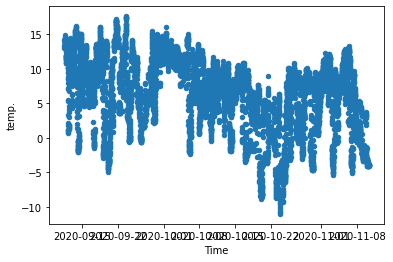

In [26]:
df.plot.scatter("Time", "temp.")